### 0. Imports

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

def exploracion_dataframe(dataframe):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas.

    Params:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    - columna_control (str): El nombre de la columna que se utilizará como control para dividir el DataFrame.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    print(f"El número de datos es {dataframe.shape[0]} y el de columnas es {dataframe.shape[1]}")
    print("\n ..................... \n")

    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    



### 0.1 Import data

In [37]:
shopper_intention = pd.read_csv("../datos/online_shoppers_intention_clase.csv",index_col=0)

In [38]:
exploracion_dataframe(shopper_intention)

El número de datos es 12330 y el de columnas es 15

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 66

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Month,0.997567
Region,15.004055
TrafficType,0.145985
VisitorType,4.995945
Administrative,10.000000
ProductRelated,9.002433
BounceRates,12.798054



 ..................... 

Los tipos de las columnas son:


,tipo_dato
AdministrativeDuration,float64
Informational,float64
InformationalDuration,float64
ProductRelatedDuration,float64
ExitRates,float64
PageValues,float64
Month,object
OperatingSystems,object
Browser,object
Region,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna MONTH tiene las siguientes valore únicos:


,count
Month,
May,3337
Nov,2966
Mar,1887
Dec,1704
Oct,542


La columna OPERATINGSYSTEMS tiene las siguientes valore únicos:


,count
OperatingSystems,
Windows,6601
MacOS,2585
Linux,2555
iOS,478
Android,98


La columna BROWSER tiene las siguientes valore únicos:


,count
Browser,
Google Chrome,7961
Mozilla Firefox,2462
Safari,736
Microsoft Edge,467
Opera,174


La columna REGION tiene las siguientes valore únicos:


,count
Region,
Region1,3698
Region3,1803
Unknown,1035
Region4,933
Region2,864


La columna TRAFFICTYPE tiene las siguientes valore únicos:


,count
TrafficType,
OT,3821
DT,2400
RT,2014
SMT,1050
PMCT,720


La columna VISITORTYPE tiene las siguientes valore únicos:


,count
VisitorType,
Returning_Visitor,10125
New_Visitor,1511
Other,78


In [39]:
def plot_univariante_numerica(df, ncols):

    columnas_numericas = df.select_dtypes(include = np.number).columns
    nrows = math.ceil(len(columnas_numericas)/ncols)

    fig, axes = plt.subplots(nrows = nrows, ncols=ncols, figsize=(15,4*nrows))
    axes_flat = axes.flat

    for ax, columna in zip(axes_flat, columnas_numericas):
        if df[columna].nunique() < 30:
            plot = sns.countplot
            title = "Countplot"
        else:
            plot = sns.histplot
            title = "Histplot"
        plot(data = df, x=columna, ax=ax)
        ax.set_title(title + f" de la variable {columna}")
    

    empty_subplots = ncols * nrows - len(columnas_numericas)
    if empty_subplots > 0:
        for idx in range(1,empty_subplots+1):
            fig.delaxes(axes_flat[-idx])

    plt.tight_layout()
    plt.show()

In [40]:
def plot_univariante_categorica(df, ncols):

    columnas_numericas = df.select_dtypes(include = ["O","category"]).columns
    nrows = math.ceil(len(columnas_numericas)/ncols)

    fig, axes = plt.subplots(nrows = nrows, ncols=ncols, figsize=(15,4*nrows))
    axes_flat = axes.flat

    for ax, columna in zip(axes_flat, columnas_numericas):
        sns.countplot(data = df, x=columna, ax=ax, hue=columna)
        ax.set_title(columna)
        ax.xticks_params(rotation=90)
    

    empty_subplots = ncols * nrows - len(columnas_numericas)
    if empty_subplots > 0:
        for idx in range(1,empty_subplots+1):
            fig.delaxes(axes_flat[-idx])

    plt.tight_layout()
    plt.show()

In [41]:
def separar_dataframe(dataframe):
    return (dataframe.select_dtypes(include=np.number),dataframe.select_dtypes(include=["O","category"]))

In [42]:
def relacion_vr_categoricas(dataframe, variable_respuesta, paleta = "mako", figsize=(15,10)):
    df_cat = separar_dataframe(dataframe)[1]
    num_filas = math.ceil(len(df_cat.columns)/2)
    fig, axes = plt.subplots(nrows= num_filas, ncols=2, figsize=figsize)
    axes = axes.flat

    for ax, columna in zip(axes,df_cat.columns):
        datos_agrupados = dataframe.groupby(columna)[variable_respuesta].mean().reset_index().sort_values(variable_respuesta,ascending=False)
        sns.barplot(
            data=datos_agrupados,
            x=columna,
            y=variable_respuesta,
            ax=ax,
            palette=paleta,
            order=datos_agrupados.sort
        )
        ax.xtick_params(rotations=90)
        ax.set_title(columna)
        
    plt.tight_layout()
    plt.show()
    

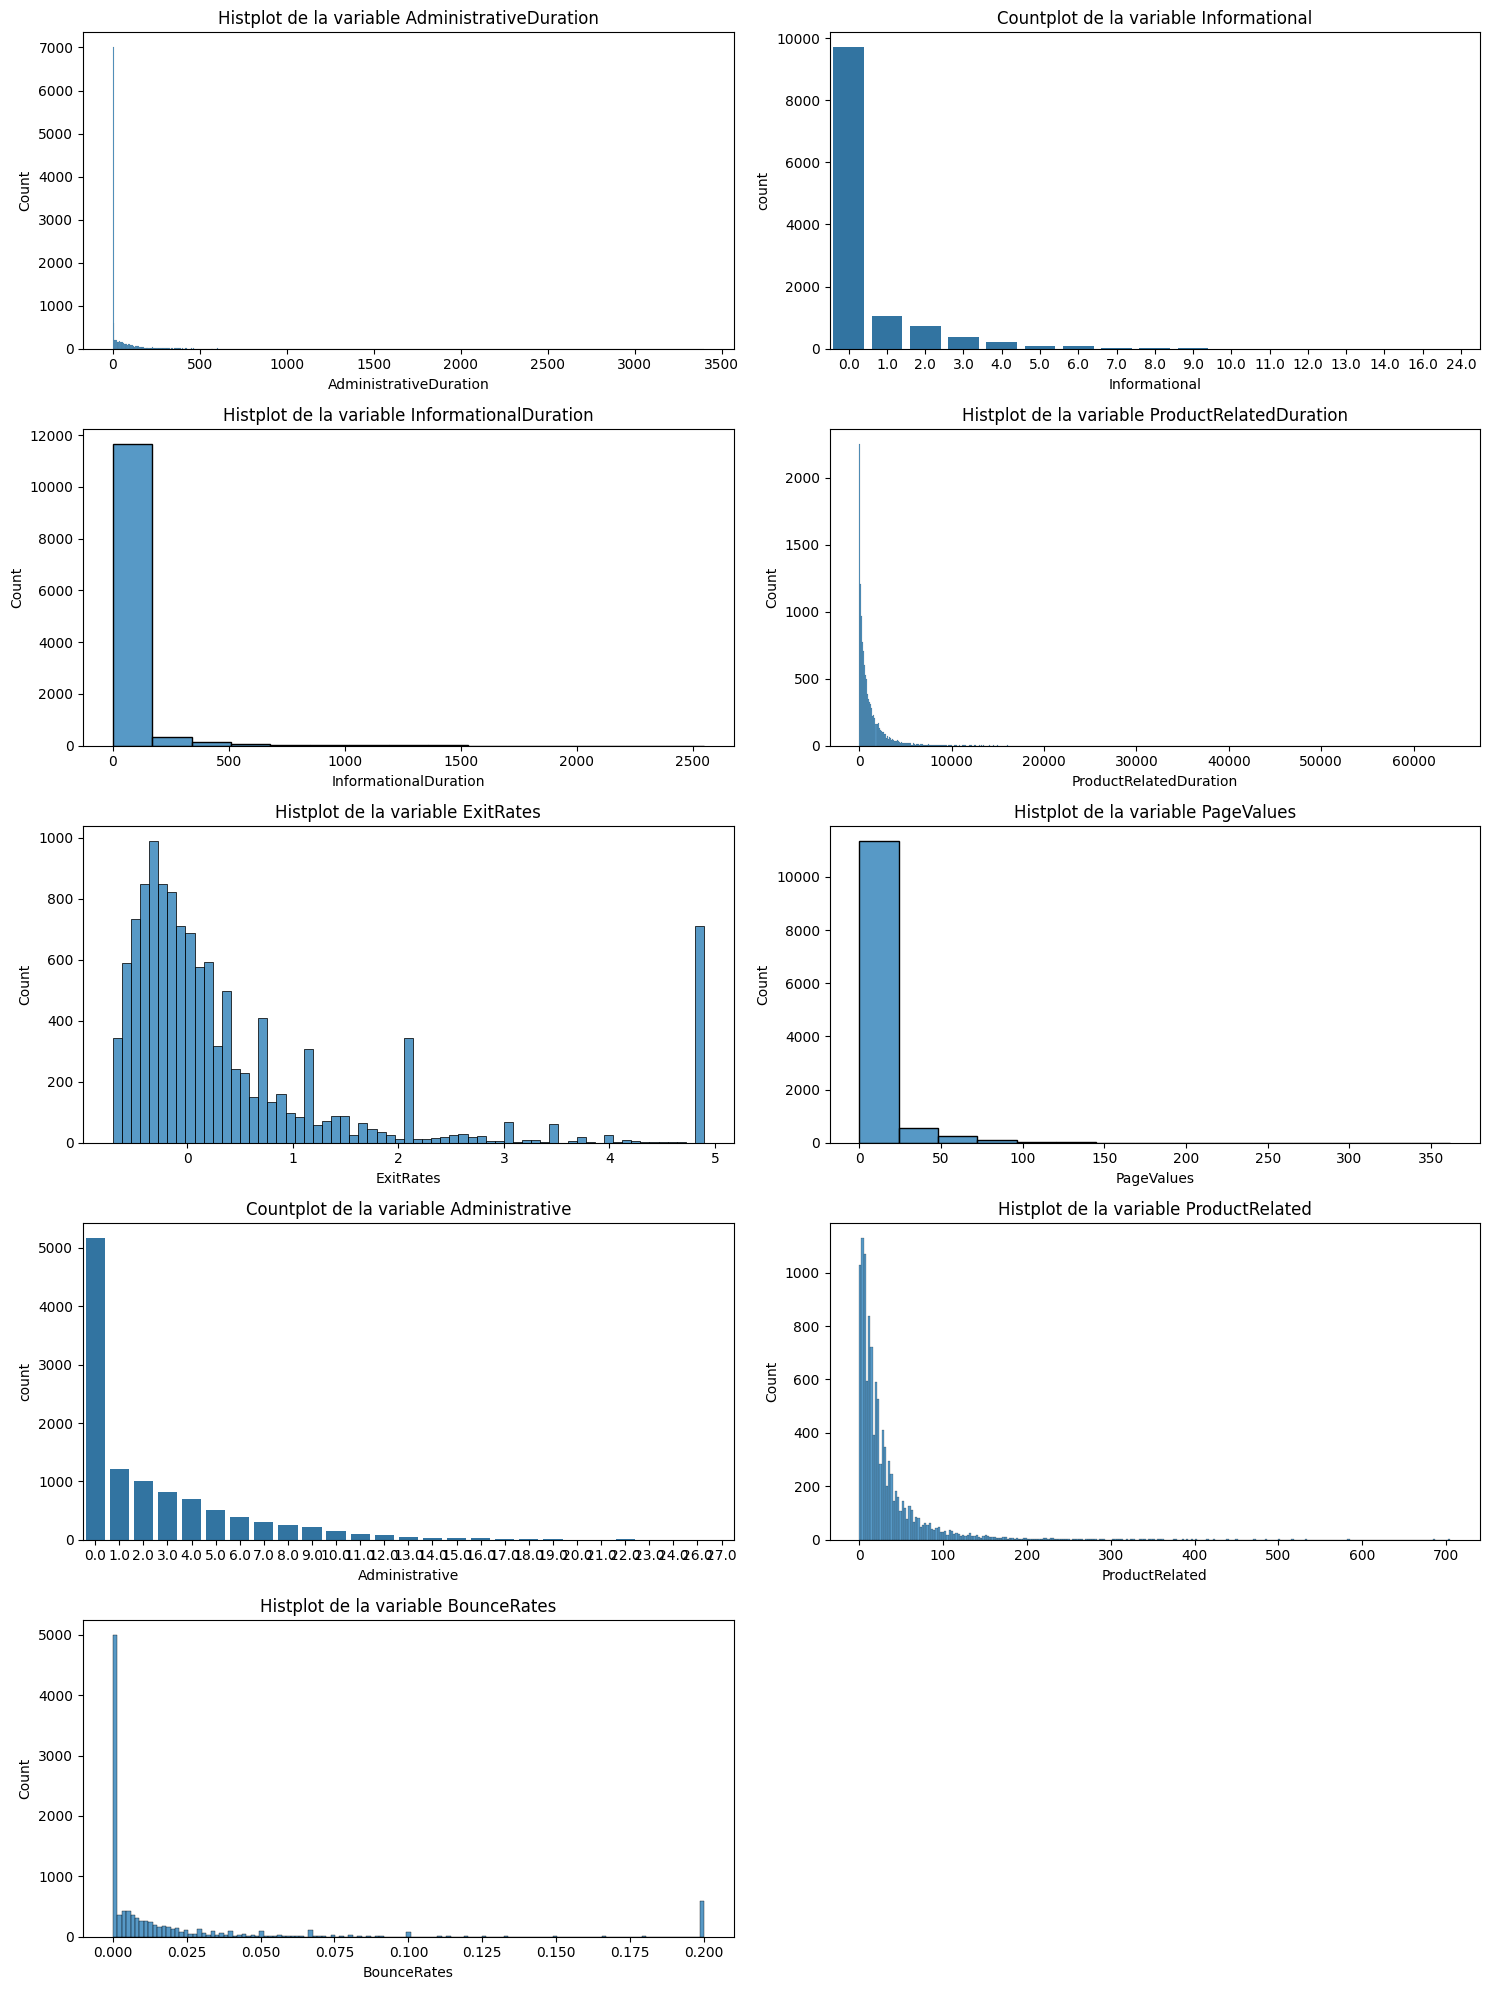

In [43]:
plot_univariante_numerica(shopper_intention, ncols=2)

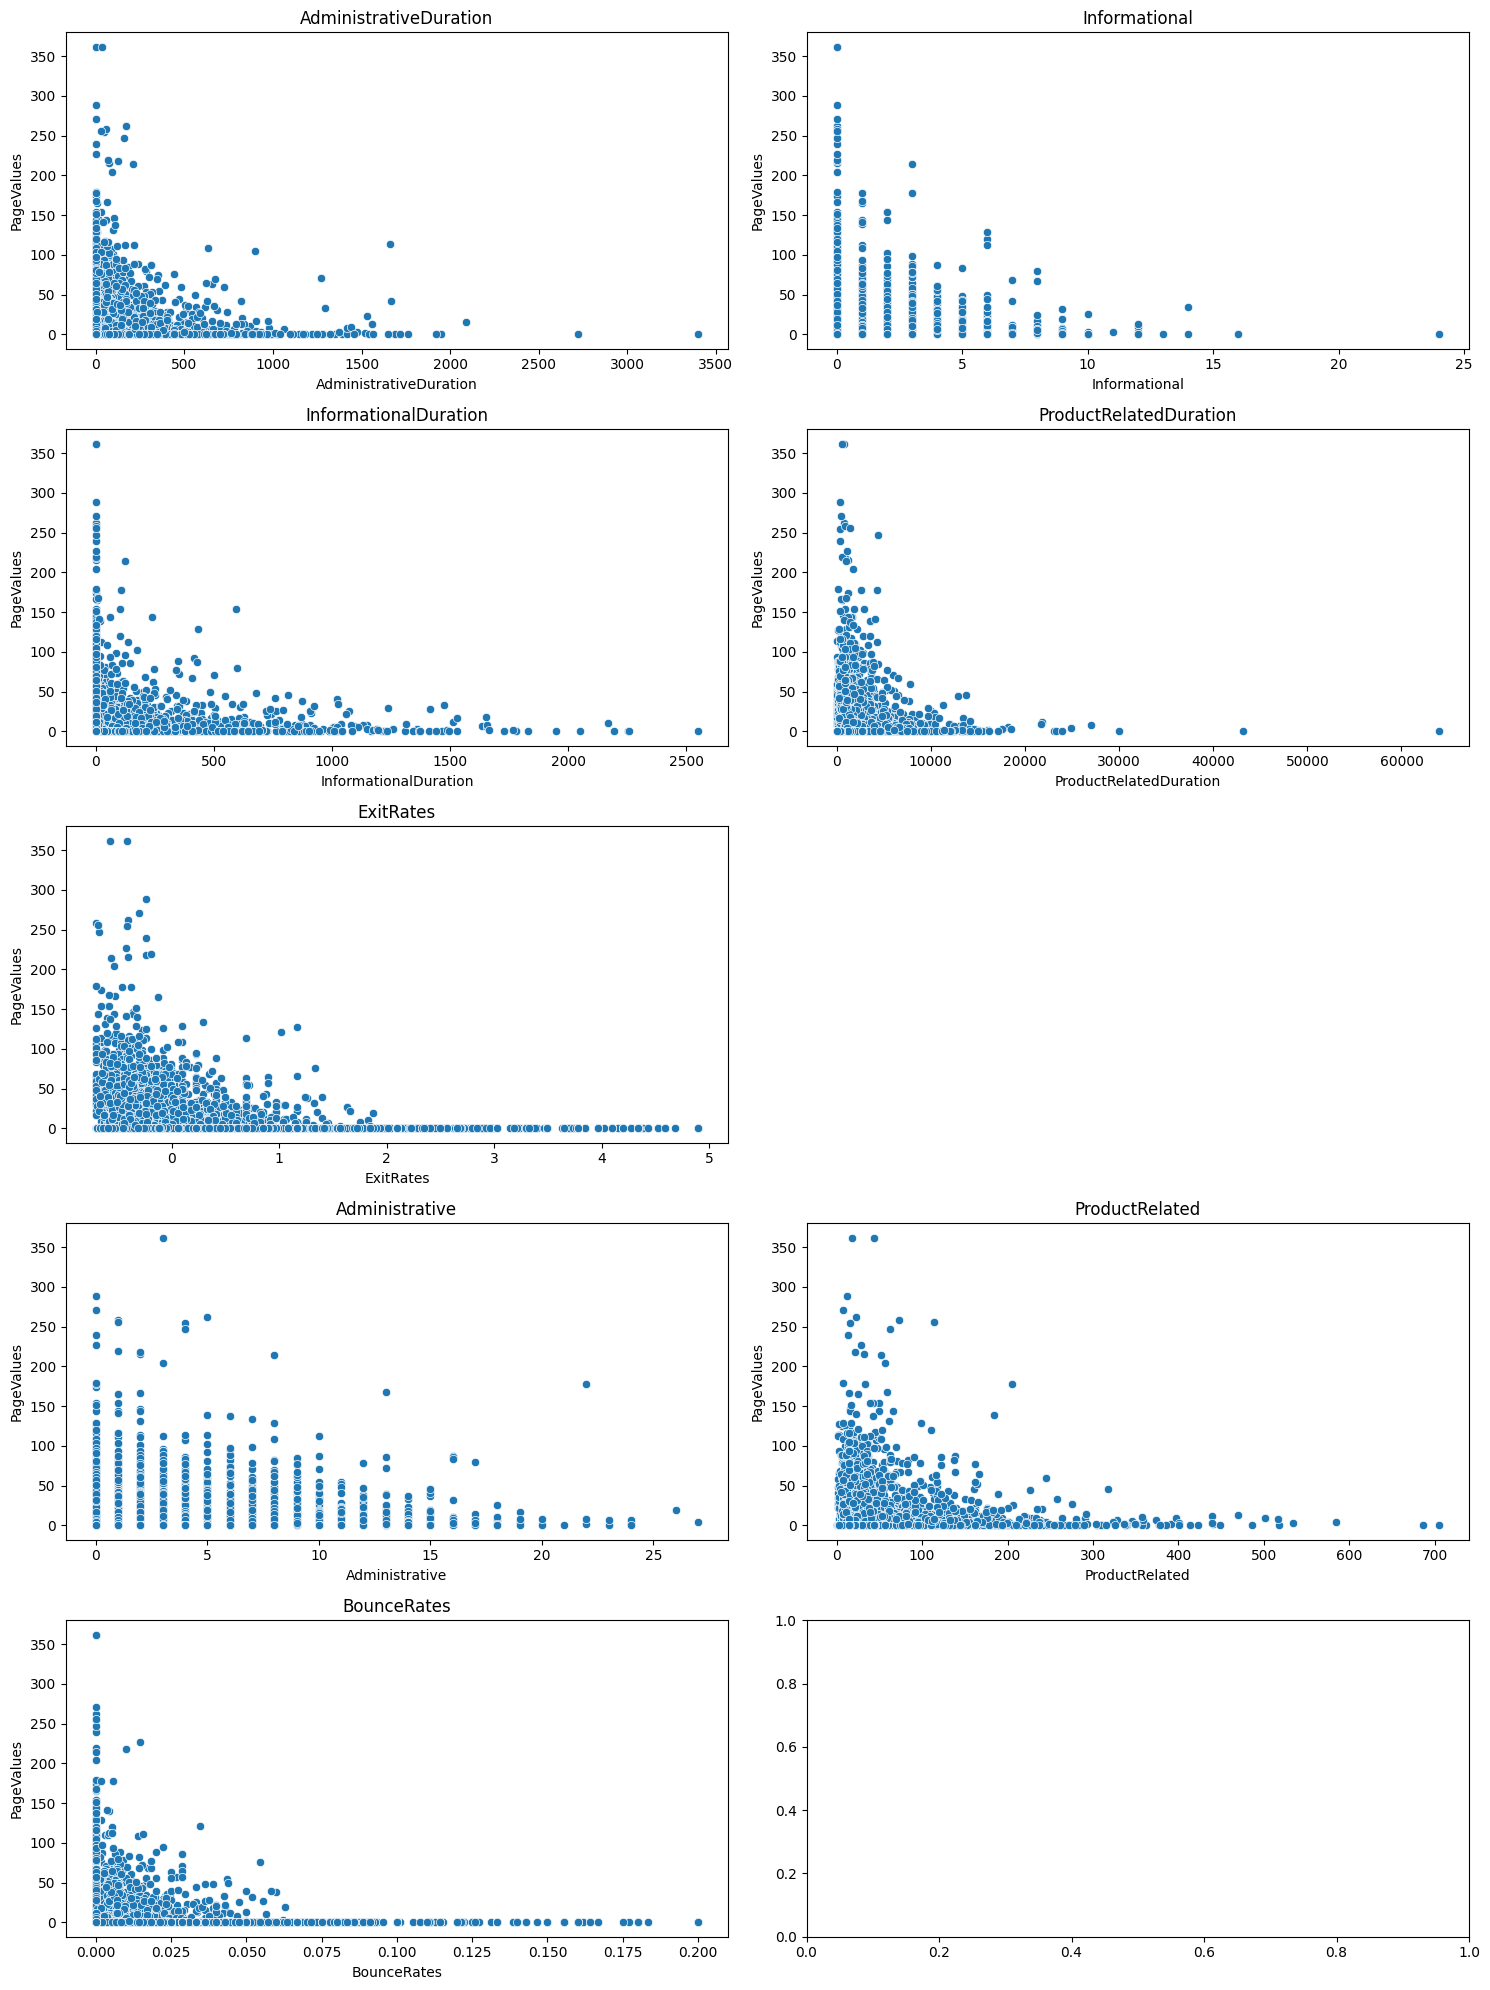

In [ ]:
def relacion_vr_numericas(dataframe, variable_respuesta, figsize=(15,20)):
    df_num = separar_dataframe(dataframe)[0]
    num_filas = math.ceil(len(df_num.columns)/2)
    fig, axes = plt.subplots(nrows= num_filas, ncols=2, figsize=figsize)
    axes = axes.flat

    for ax, columna in zip(axes,df_num.columns):
        if columna == variable_respuesta:
            fig.delaxes(ax)
        
        else:
            sns.scatterplot(
                data=dataframe,
                x=columna,
                y=variable_respuesta,
                ax=ax
            )
            ax.set_title(columna)
        
    plt.tight_layout()
    plt.show()


relacion_vr_numericas(shopper_intention, variable_respuesta="PageValues")

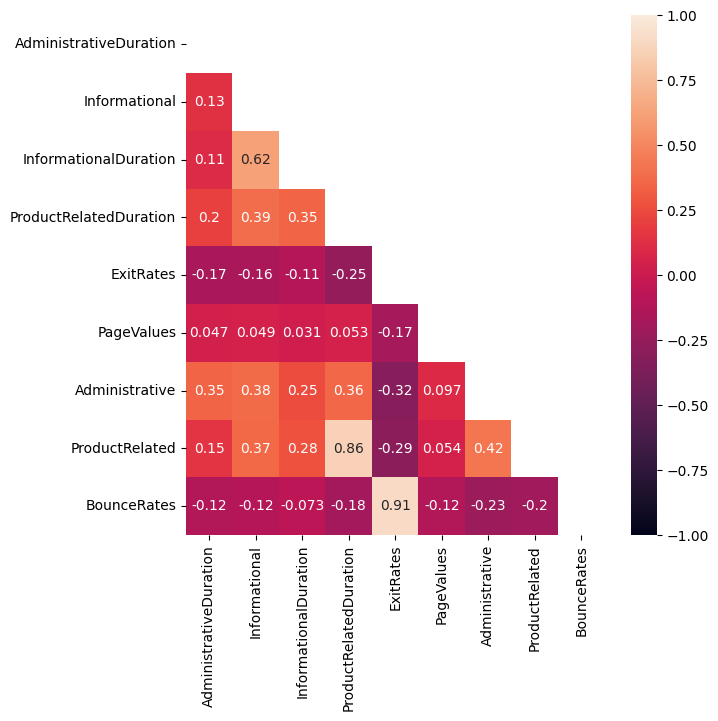

In [60]:
def matriz_correlacion(dataframe):
    matriz_corr= dataframe.corr(numeric_only=True)
    mascara = np.triu(np.ones_like(matriz_corr, dtype=np.bool_))
    
    plt.figure(figsize=(0.75*matriz_corr.shape[0],0.75*matriz_corr.shape[0]))
    sns.heatmap(matriz_corr,
                annot=True,
                vmin=-1,
                vmax=1,
                mask=mascara)

matriz_correlacion(shopper_intention)

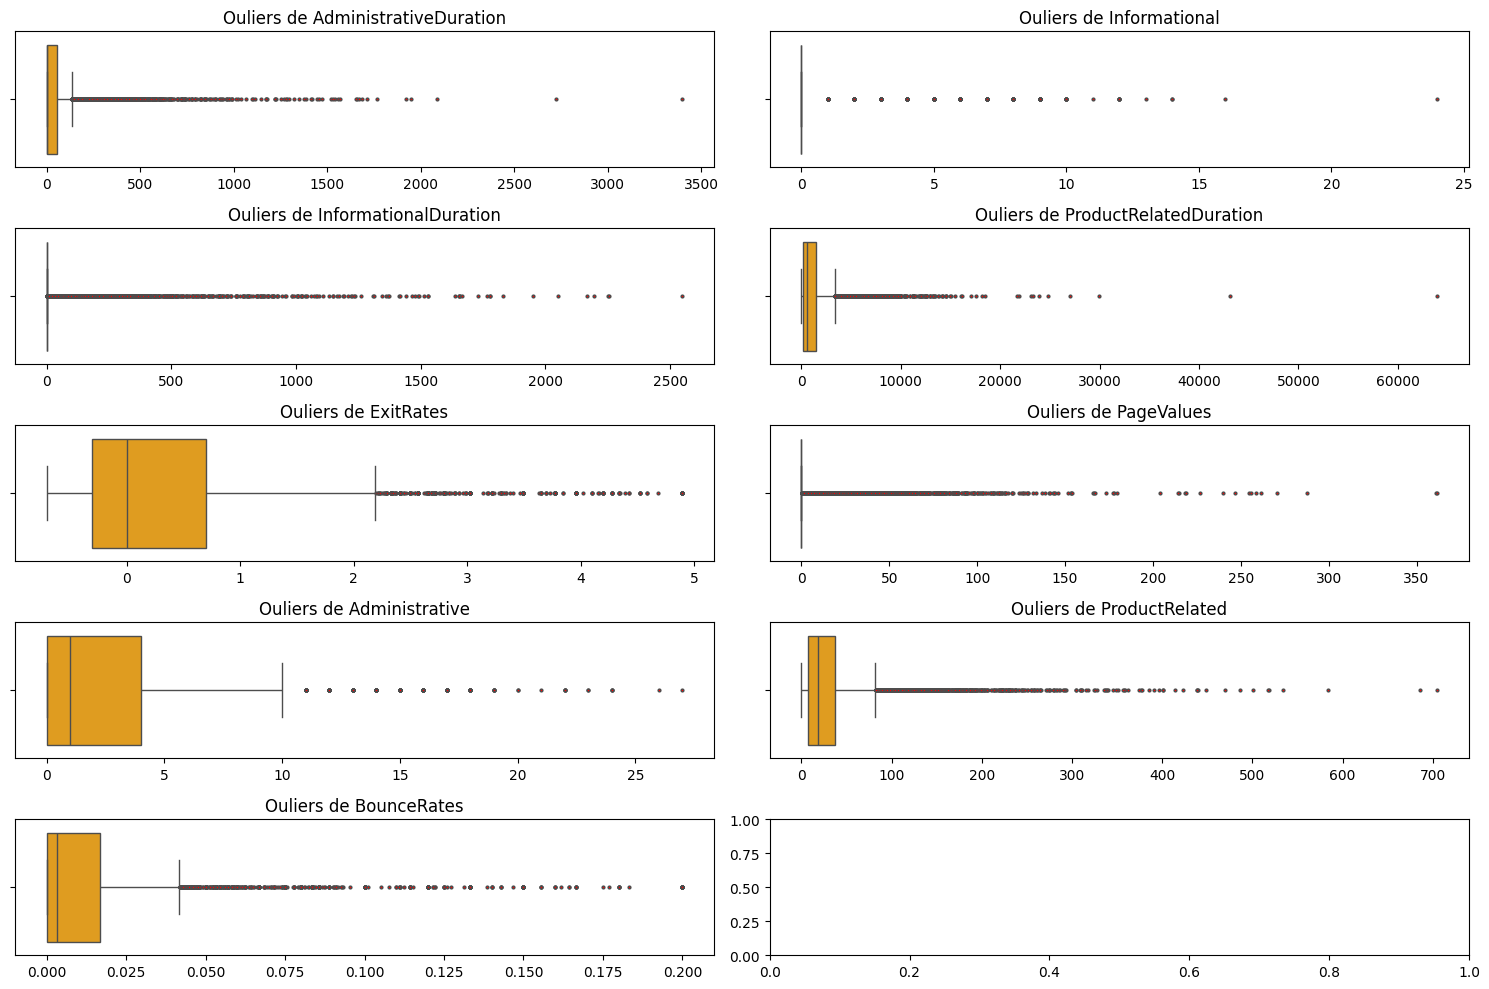

In [67]:
def detectar_outliers(dataframe, color="orange",figsize=(15,10)):
    df_num = separar_dataframe(dataframe)[0]

    n_rows = math.ceil(len(df_num.columns)/2)

    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=figsize)
    axes = axes.flat

    for ax, columna in zip(axes, df_num.columns):
        sns.boxplot(data=dataframe,
                    x=columna,
                    color=color,
                    ax=ax,
                    flierprops={"markersize":2,"markerfacecolor":"red"})
        ax.set_title(f"Ouliers de {columna}")
        ax.set_xlabel("")
    
    plt.tight_layout()

detectar_outliers(shopper_intention)

In [72]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [88]:
df = shopper_intention.copy()

In [90]:
df = df.drop_duplicates().reset_index(drop=True)
df.isna().sum()

index                        0
AdministrativeDuration       0
Informational                0
InformationalDuration        0
ProductRelatedDuration       0
ExitRates                    0
PageValues                   0
Month                      122
OperatingSystems             0
Browser                      0
Region                    1841
TrafficType                 18
VisitorType                616
Administrative            1231
ProductRelated            1109
BounceRates               1576
dtype: int64

#### Simple imputer

In [91]:
shopper_intention.shape

(12330, 15)

In [97]:
df_num = df.select_dtypes(include=np.number)
imputer_knn = KNNImputer(n_neighbors=5)
knn_imputado = imputer_knn.fit_transform(df_num)
df_num_imputed = pd.DataFrame(knn_imputado,columns=df_num.columns)
df_knn = df.copy()
df_knn[df_num.columns] = df_num_imputed
df_knn.head()

,index,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative,ProductRelated,BounceRates
0,0.0,0.0,0.0,0.0,0.000000,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,DT,Returning_Visitor,0.0,1.0,0.20
1,1.0,0.0,0.0,0.0,64.000000,2.095621,0.0,Feb,Windows,Google Chrome,Region1,OT,Returning_Visitor,0.0,2.0,0.00
2,2.0,0.0,0.0,0.0,0.000000,4.895621,0.0,Feb,iOS,Mozilla Firefox,Region9,RT,NaN,0.2,1.0,0.17
3,3.0,0.0,0.0,0.0,2.666667,3.215621,0.0,Feb,Linux,Google Chrome,Unknown,SMT,Returning_Visitor,0.2,2.0,0.05
4,4.0,0.0,0.0,0.0,627.500000,0.695621,0.0,Feb,Linux,Tor,Region1,SMT,Returning_Visitor,0.0,10.0,0.02


In [98]:
df_knn.isna().sum()

index                        0
AdministrativeDuration       0
Informational                0
InformationalDuration        0
ProductRelatedDuration       0
ExitRates                    0
PageValues                   0
Month                      122
OperatingSystems             0
Browser                      0
Region                    1841
TrafficType                 18
VisitorType                616
Administrative               0
ProductRelated               0
BounceRates                  0
dtype: int64

Iterative imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute._iterative import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

imputer_iterative = IterativeImputer(initial_strategy)

imputado_iterative = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos_iterative = pd.DataFrame(imputado_iterative, columns=df_num.columns)
df_iterative = df.copy()
df_iterative[df_num.columns] = df_num_sin_nulos_iterative
df_iterative.head()

InvalidParameterError: The 'initial_strategy' parameter of IterativeImputer must be a str among {'mean', 'constant', 'most_frequent', 'median'}. Got <class 'sklearn.ensemble._forest.RandomForestRegressor'> instead.